In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris()
X = iris.data  
y = iris.target 


In [3]:
y_categorical = to_categorical(y, num_classes = 3)

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42) 

In [4]:
model = Sequential([
   #capa entrada
    Dense(10, activation='relu', input_shape=(4,)),
    #capa oculta1
    Dense(8, activation='relu'),
    #capa oculta2
    Dense(6, activation='relu'),
    #capa sortida
    Dense(3, activation='softmax')
])

print(model.summary())

c:\Users\paula\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213 (852.00 B)

 Trainable params: 213 (852.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [6]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.3417 - loss: 1.1584 - val_accuracy: 0.3000 - val_loss: 1.1416
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3417 - loss: 1.1393 - val_accuracy: 0.3000 - val_loss: 1.1267
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3417 - loss: 1.1257 - val_accuracy: 0.3000 - val_loss: 1.1133
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3417 - loss: 1.1117 - val_accuracy: 0.3000 - val_loss: 1.1023
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3417 - loss: 1.1001 - val_accuracy: 0.3000 - val_loss: 1.0920
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3417 - loss: 1.0892 - val_accuracy: 0.3000 - val_loss: 1.0826
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3417 - loss: 1.0805 - val_accuracy: 0.3000 - val_loss: 1.0735
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3417 - loss: 1.0715 - val_accuracy: 0.3000 - val_loss:

In [7]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.1461

compile_metrics: 100.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


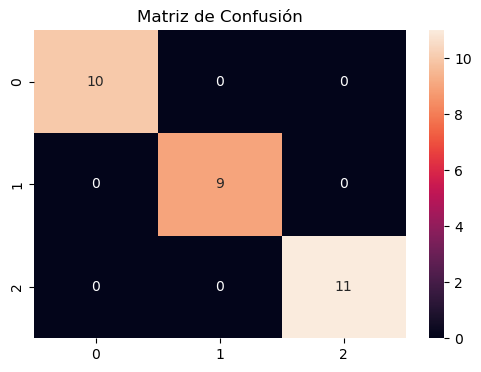

In [8]:

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Matriz de Confusión')
plt.show()